In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline

## Description of MercuryDPM output

data output files are formatted with a first line with the following structure,

N, time, xmin, ymin, zmin, xmax, ymax, zmax,

then followed by a series of N subsequent lines, each providing information for one of the N particles within the system at the current point in time. For each particle, we are given information regarding its current position in three dimensions (x, y, z), the magnitudes of the three components of its instantaneous velocity (vx, vy, vz), the radius of the particle (rad), its angular position in three dimensions (qx, qy, qz) and the three components of its instantaneous angular velocity (omex, omey, omez).

fstat output files have the following structure. For each time step, three lines are output, each preceded by a # symbol. The first element shows the current time step. 

The initial information is followed by a series of $N_c$ lines corresponding to each of the $N_c$ particle contacts (as opposed to particles) within the system at the current instant in time. 

Each of these lines is structured as follows:

time, i, j, x, y, z, $\Delta$, $\Delta t$, fn, ft, nx, ny, nz, tx, ty, tz

### Loading MercuryDPM output files

In [2]:
fstat="VerticalMixer.fstat"
data="radii.txt"
collisions=np.loadtxt(fstat,delimiter=" ")
radii=np.loadtxt(data)

In [3]:
N_particles=5000
len_coll=len(collisions)
#print(len_coll)

856377


### Data preprocessing 

#### Separating particle radii data by timestep

In [4]:
class dictionary(dict): 
    # __init__ function 
    def __init__(self):
        self=dict() 
    # Function to add key:value 
    def add(self, key, value): 
        self[key]=value 

In [5]:
t_final=2
N=math.ceil(t_final/0.06666)
print('the number of time steps is: ',N)

the number of time steps is:  31


In [26]:
Rdict=dictionary()
Rdict_actual=dictionary()
for i in range(0,N):
    beg=1+(N_particles+1)*i
    end=(N_particles+1)+(N_particles+1)*i
    rounded=(np.round(radii[beg:end]*10000*2).astype(int)-20)#/2
    Rdict.add(i+1,rounded)
    Rdict_actual.add(i+1,radii[beg:end])
radii_df=pd.DataFrame(Rdict)
radii_act_df=pd.DataFrame(Rdict_actual)

In [27]:
radii_df.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
1,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
2,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


In [28]:
radii_act_df.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,0.001394,0.001394,0.001394,0.001394,0.001394,0.001394,0.001394,0.001394,0.001394,0.001394,...,0.001394,0.001394,0.001394,0.001394,0.001394,0.001394,0.001394,0.001394,0.001394,0.001394
1,0.001417,0.001417,0.001417,0.001417,0.001417,0.001417,0.001417,0.001417,0.001417,0.001417,...,0.001417,0.001417,0.001417,0.001417,0.001417,0.001417,0.001417,0.001417,0.001417,0.001417
2,0.001500,0.001500,0.001500,0.001500,0.001500,0.001500,0.001500,0.001500,0.001500,0.001500,...,0.001500,0.001500,0.001500,0.001500,0.001500,0.001500,0.001500,0.001500,0.001500,0.001500
3,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150,...,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150
4,0.001366,0.001366,0.001366,0.001366,0.001366,0.001366,0.001366,0.001366,0.001366,0.001366,...,0.001366,0.001366,0.001366,0.001366,0.001366,0.001366,0.001366,0.001366,0.001366,0.001366


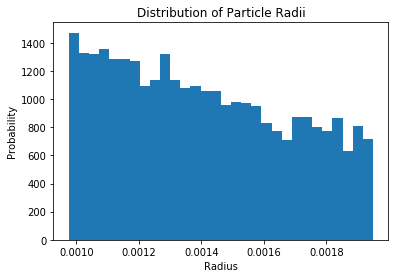

In [30]:
plt.hist(radii_act_df[1], normed=True, bins=30)
plt.ylabel('Probability')
plt.xlabel('Radius')
plt.title('Distribution of Particle Radii');

#### Finding the min and max radii 

In [11]:
minmax=[]
for i in range(1,N+1):
    minmax.append(min(radii_df[i]))
    minmax.append(max(radii_df[i]))

print('The min radius is: ',min(minmax))
print('The max radius is: ',max(minmax))

The min radius is:  0
The max radius is:  19


#### Separating collision data into lists by timestep

In [12]:
i=0
j=0
coll_list=[]
for i in range(0,N):
    if j<len_coll:
        time=collisions[j][0]
        dt_coll=[]
        while collisions[j][0]==time:
            dt_coll.append(collisions[j])
            j+=1
            if j==7406:
                break
        coll_list.append(dt_coll)

#### Keeping only particle-particle collision data 

In [13]:
particle_collisions=[]
for i in range(0,N):
    dt_coll=[]
    for collision in coll_list[i]:
        if collision[2] >= 0:
            dt_coll.append(collision[1:3])
    particle_collisions.append(dt_coll)    

#### Replacing particle labels with radii

In [14]:
Ltotal=0
for i in range(0,N):
    for collisions in particle_collisions[i]:
        j=collisions[0]
        k=collisions[1]
        collisions[0]=radii_df[i+1][j]
        collisions[1]=radii_df[i+1][k]
    #print(len(particle_collisions[i])) # Making sure they're are all even
    Ltotal+=len(particle_collisions[i])

print(Ltotal)

793256


### Collision Frequency

Collision frequency is determined by the equation (modified from Barrasso 2015):

$$
C(s,s',t)=\frac{N_{coll}(s,s',t)}{F(s,t)F(s',t)\Delta t},
$$

where $s$ represents the size of the particle (as measured by its radius), $F$ represents the number of particles or particle density as a function of particle size/class and time.

#### Collecting collision frequency into a list of arrays ($N_{coll}(s,s',t)$ at each time step)

In [15]:
N_Total=[]
D=len(np.arange(0,20))


for i in range(0,31):
    N_dt=np.zeros([D,D])
    for collisions in particle_collisions[i]:
        p1=collisions[0].astype(int)
        p2=collisions[1].astype(int)
        N_dt[p1,p2]+=1
    i,j=np.indices(N_dt.shape)
    N_dt[i==j]=N_dt.diagonal()*0.5
    N_Total.append(N_dt)

#### Finding $F(s,t)$ at each time step

In [16]:
F_Total=[]
for i in range(0,31):
    F_dt=np.zeros(20).astype(int)
    for size in radii_df[i+1]:
        F_dt[size]+=1
    F_Total.append(F_dt)    

In [19]:
print(sum(F_Total[0]),sum(F_Total[30]))  # verifying that it is 5000

5000 5000


#### Creating arrays for $C(s,s',t)$ from $N_{coll}(s,s',t)$ and $F(s,t)$

In [20]:
C_Total=[]
for i in range(0,31):
    C_dt=np.zeros([D,D])
    for size in range(0,20):
        for sizep in range(0,20):
            if i==30:
                dt=0.000333333
            else:
                dt=0.06666666667
            FFpdt=F_Total[i][size]*F_Total[i][sizep]*dt
            C_dt[size,sizep]=N_Total[i][size,sizep]*(1/FFpdt)
    C_Total.append(C_dt)